# using label encoder, log trans after standardization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("C:\\Users\\ushak\\Desktop\\internship_project\\datasets\\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [4]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8.0,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,NaN,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [5]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Global_Sales       float64
dtype: object

In [6]:
data.describe(include=['float64'])

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000,16719.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,68.967679,26.360821,7.125046,162.229908,0.533543
std,5.878995,0.813514,0.503283,0.308818,0.186710,13.938165,18.980495,1.500006,561.282326,1.547935
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,12.000000,6.400000,10.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,21.000000,7.500000,24.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,36.000000,8.200000,81.000000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,98.000000,113.000000,9.700000,10665.000000,82.530000


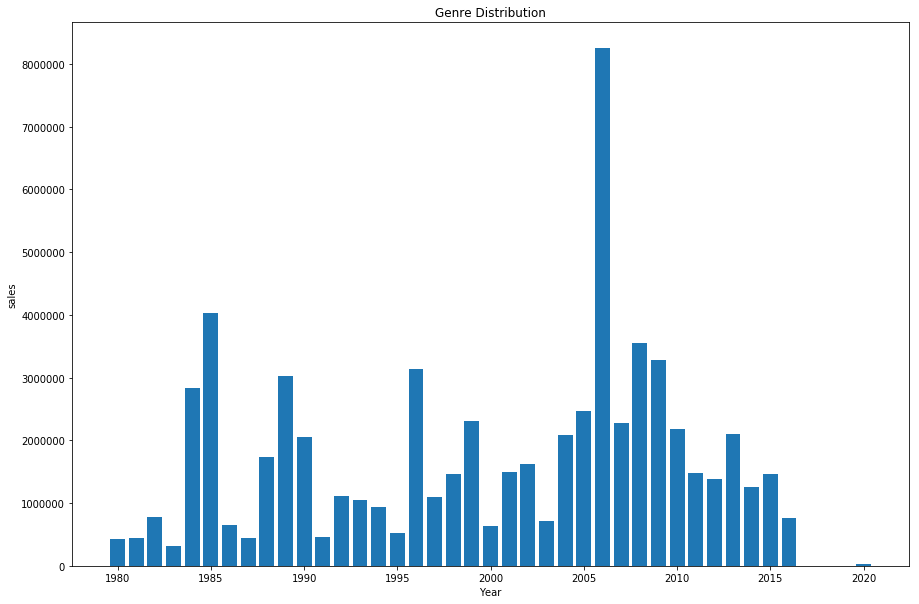

In [7]:
plt.figure(figsize=(15,10))
plt.bar(data['Year_of_Release'],(data['Global_Sales']*100000))
plt.title('Genre Distribution')
plt.xlabel('Year')
plt.ylabel('sales')
plt.show()

In [8]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
Global_Sales          0
dtype: int64

In [9]:
data.select_dtypes(include='object').nunique()

Name         11562
Platform        31
Genre           12
Publisher      582
Developer     1696
Rating           8
dtype: int64

In [10]:
data1=data.drop(['User_Score','Critic_Score','Critic_Count','User_Count','Developer','Name','Year_of_Release','Publisher','Rating'],axis=1)

In [11]:
data2=data1.dropna(subset=['Genre'],how='all')

In [12]:
data2.isnull().sum()

Platform        0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
print(data2.duplicated().sum())

4449


In [14]:
data3=data2.drop_duplicates(inplace=False)

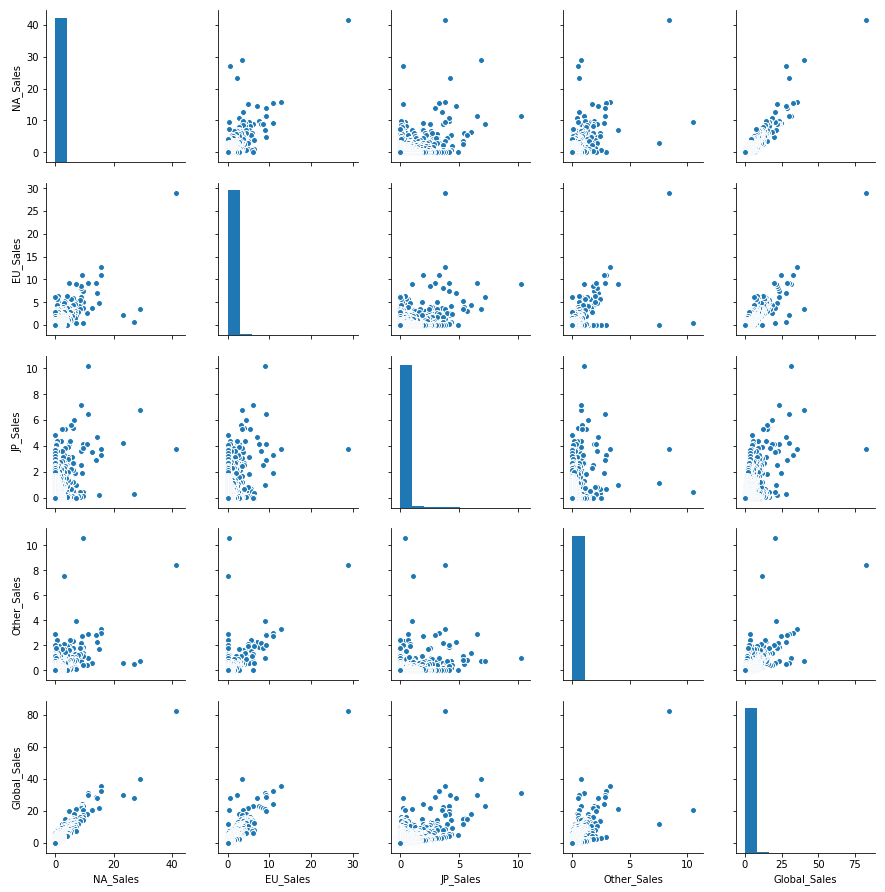

In [15]:
sns.pairplot(data3)

In [16]:
data3.shape

(12268, 7)

In [17]:
data3.columns

Index(['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [18]:
data3.dtypes

Platform         object
Genre            object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [19]:
numcols = ['NA_Sales','JP_Sales','EU_Sales','Other_Sales']

In [20]:
numeric_cols = data3[numcols]

#Calculate the first and third quartiles for each column
q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)

#Calculate the IQR for each column
iqr = q3 - q1

#Define the outlier bounds for each column
lower_bounds = q1 - 1.5 * iqr
upper_bounds = q3 + 1.5 * iqr

# Filter out rows that fall outside the bounds for each column
for col in numeric_cols.columns:
    data3 = data3[(data[col] >= lower_bounds[col]) & (data3[col] <= upper_bounds[col])]

# Print the filtered DataFrame
data3

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1536,XOne,Role-Playing,0.78,0.38,0.00,0.12,1.28
1560,DS,Adventure,0.75,0.39,0.00,0.12,1.27
1564,X360,Fighting,0.74,0.40,0.00,0.12,1.27
1571,Wii,Sports,0.76,0.39,0.00,0.11,1.26
1581,DS,Strategy,0.77,0.37,0.00,0.11,1.25
...,...,...,...,...,...,...,...
16690,Wii,Racing,0.00,0.00,0.01,0.00,0.01
16697,N64,Sports,0.01,0.00,0.00,0.00,0.01
16698,N64,Action,0.01,0.00,0.00,0.00,0.01
16713,PS2,Racing,0.00,0.00,0.00,0.00,0.01


In [21]:
scaler = StandardScaler()
#scaler = RobustScaler()
data3[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = scaler.fit_transform(data3[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])


In [22]:
data3

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1536,XOne,Role-Playing,3.865561,3.597285,-0.428118,3.940340,1.28
1560,DS,Adventure,3.681500,3.712055,-0.428118,3.940340,1.27
1564,X360,Fighting,3.620147,3.826826,-0.428118,3.940340,1.27
1571,Wii,Sports,3.742854,3.712055,-0.428118,3.543523,1.26
1581,DS,Strategy,3.804208,3.482514,-0.428118,3.543523,1.25
...,...,...,...,...,...,...,...
16690,Wii,Racing,-0.920023,-0.763995,-0.056046,-0.821472,0.01
16697,N64,Sports,-0.858669,-0.763995,-0.428118,-0.821472,0.01
16698,N64,Action,-0.858669,-0.763995,-0.428118,-0.821472,0.01
16713,PS2,Racing,-0.920023,-0.763995,-0.428118,-0.821472,0.01


In [23]:
encoder=LabelEncoder()
data3.loc[:,'Platform']=encoder.fit_transform(data3.loc[:,'Platform'])
data3.loc[:,'Genre']=encoder.fit_transform(data3.loc[:,'Genre'])

In [24]:
data3

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1536,30,7,3.865561,3.597285,-0.428118,3.940340,1.28
1560,4,1,3.681500,3.712055,-0.428118,3.940340,1.27
1564,28,2,3.620147,3.826826,-0.428118,3.940340,1.27
1571,26,10,3.742854,3.712055,-0.428118,3.543523,1.26
1581,4,11,3.804208,3.482514,-0.428118,3.543523,1.25
...,...,...,...,...,...,...,...
16690,26,6,-0.920023,-0.763995,-0.056046,-0.821472,0.01
16697,10,10,-0.858669,-0.763995,-0.428118,-0.821472,0.01
16698,10,0,-0.858669,-0.763995,-0.428118,-0.821472,0.01
16713,16,6,-0.920023,-0.763995,-0.428118,-0.821472,0.01


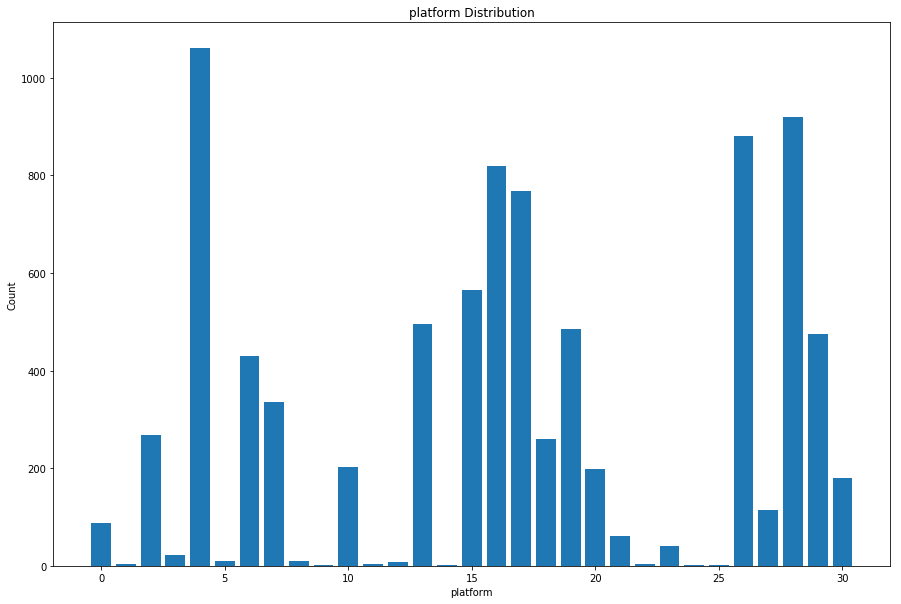

In [25]:
platform_count=data3['Platform'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(platform_count.index,platform_count.values)
plt.title('platform Distribution')
plt.xlabel('platform')
plt.ylabel('Count')
plt.show()

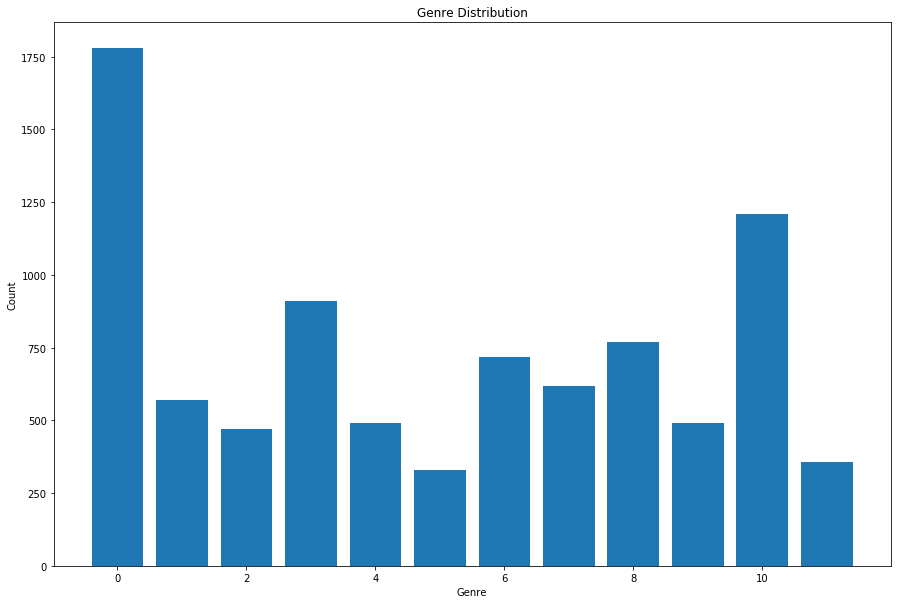

In [26]:
genre_counts=data3['Genre'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [27]:
corrr=data3.corr().abs()

In [28]:
corrr

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,1.000000,0.016839,0.057723,0.098547,0.064297,0.151693,0.085788
Genre,0.016839,1.000000,0.016469,0.021245,0.008231,0.009148,0.001533
NA_Sales,0.057723,0.016469,1.000000,0.476374,0.194048,0.599503,0.916453
EU_Sales,0.098547,0.021245,0.476374,1.000000,0.143487,0.743437,0.767800
JP_Sales,0.064297,0.008231,0.194048,0.143487,1.000000,0.104962,0.085500
Other_Sales,0.151693,0.009148,0.599503,0.743437,0.104962,1.000000,0.788918
Global_Sales,0.085788,0.001533,0.916453,0.767800,0.085500,0.788918,1.000000


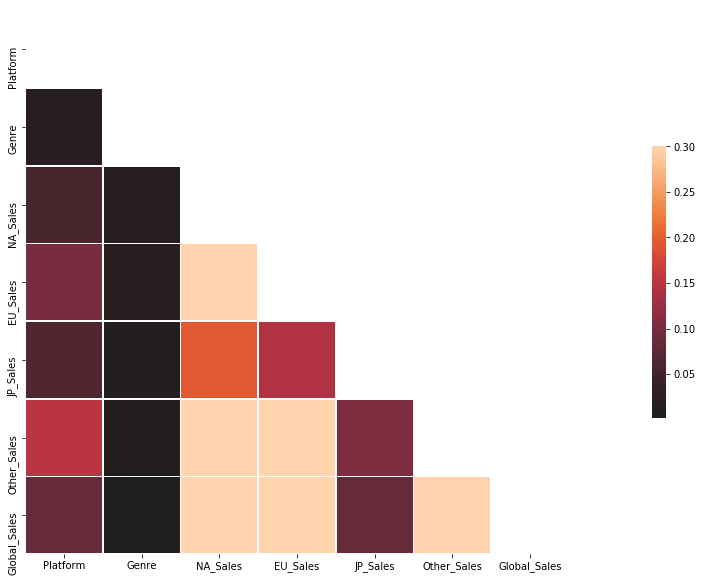

In [29]:
mask = np.triu(np.ones_like(corrr, dtype=bool))
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corrr, mask=mask,vmax=.3, center=0,
            square=True, linewidths=.60, cbar_kws={"shrink": .5})
plt.show()

In [30]:
corr_with_target = corrr['Global_Sales'].sort_values(ascending=False)

In [31]:
c=pd.DataFrame(corr_with_target[corr_with_target<0.5])

In [32]:
c

,Global_Sales
Platform,0.085788
JP_Sales,0.085500
Genre,0.001533


In [33]:
#data3=data3.drop(['EU_Sales','Other_Sales'],axis=1)

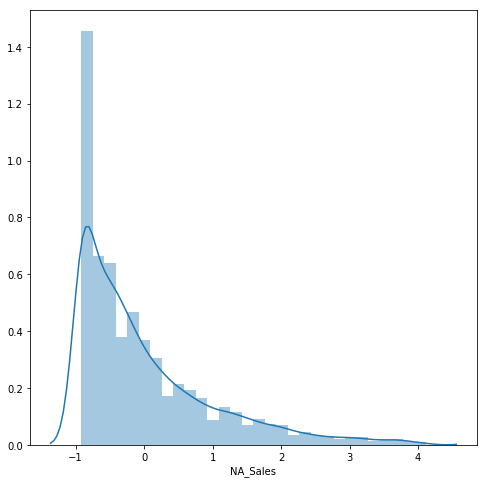

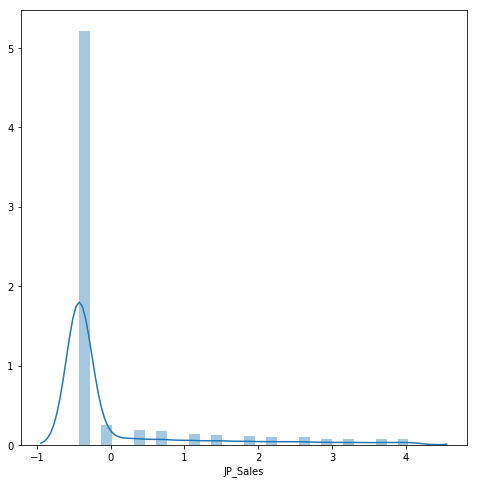

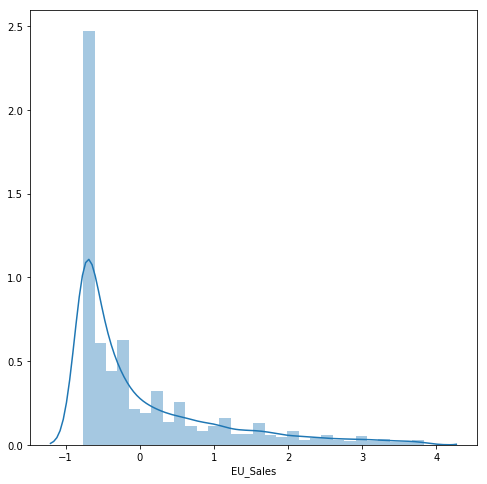

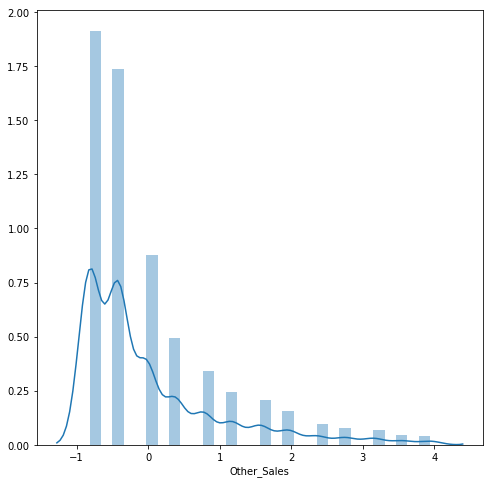

In [34]:
for col in numcols:
    plt.figure(figsize = (8, 8))
    sns.distplot(data3[col],bins=30)
    plt.show()

In [35]:
data3[numcols]= data3[numcols].abs()

In [36]:
data3[numcols]= data3[numcols]+ 0.1

In [37]:
for col in numcols:
    data3[col] = np.log(data3[col])
    
   
    
data3

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1536,30,7,1.377647,1.307599,-0.638436,1.396329,1.28
1560,4,1,1.330121,1.338168,-0.638436,1.396329,1.27
1564,28,2,1.313763,1.367831,-0.638436,1.396329,1.27
1571,26,10,1.346215,1.338168,-0.638436,1.292951,1.26
1581,4,11,1.362055,1.276065,-0.638436,1.292951,1.25
...,...,...,...,...,...,...,...
16690,26,6,0.019825,-0.146189,-1.857606,-0.081783,0.01
16697,10,10,-0.042209,-0.146189,-0.638436,-0.081783,0.01
16698,10,0,-0.042209,-0.146189,-0.638436,-0.081783,0.01
16713,16,6,0.019825,-0.146189,-0.638436,-0.081783,0.01


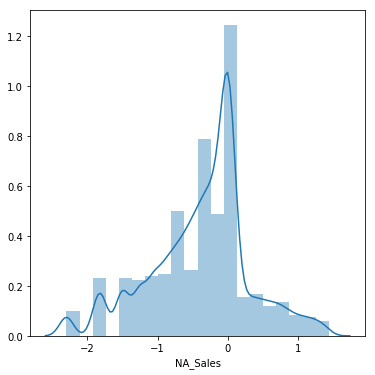

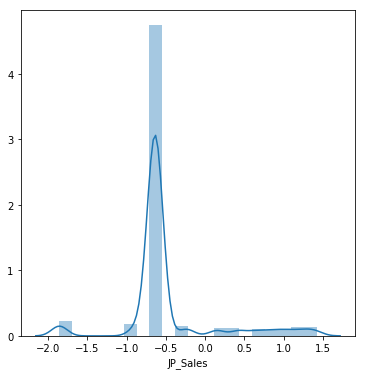

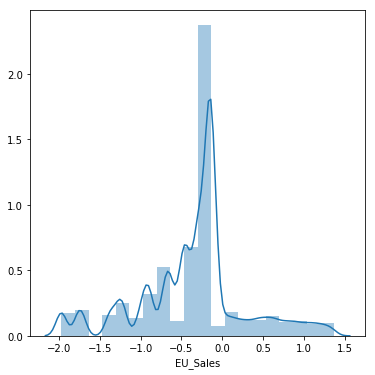

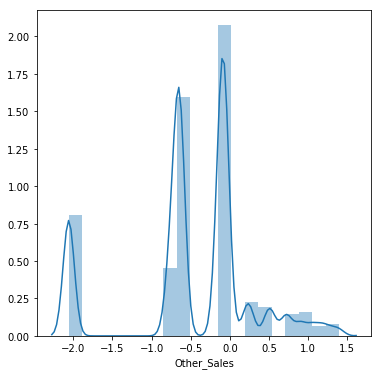

In [38]:
for col in numcols:
    plt.figure(figsize = (6,6))
    sns.distplot(data3[col],bins=20)
    plt.show()

In [39]:
X = data3.drop(['Global_Sales'], axis=1)
y = data3[['Global_Sales']]

In [40]:
X

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1536,30,7,1.377647,1.307599,-0.638436,1.396329
1560,4,1,1.330121,1.338168,-0.638436,1.396329
1564,28,2,1.313763,1.367831,-0.638436,1.396329
1571,26,10,1.346215,1.338168,-0.638436,1.292951
1581,4,11,1.362055,1.276065,-0.638436,1.292951
...,...,...,...,...,...,...
16690,26,6,0.019825,-0.146189,-1.857606,-0.081783
16697,10,10,-0.042209,-0.146189,-0.638436,-0.081783
16698,10,0,-0.042209,-0.146189,-0.638436,-0.081783
16713,16,6,0.019825,-0.146189,-0.638436,-0.081783


In [41]:
y

,Global_Sales
1536,1.28
1560,1.27
1564,1.27
1571,1.26
1581,1.25
...,...
16690,0.01
16697,0.01
16698,0.01
16713,0.01


In [42]:
# train and validation set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_trainval.shape

(6968, 6)

In [44]:
X_test.shape

(1742, 6)

In [45]:
y_trainval.shape

(6968, 1)

In [46]:
y_test.shape

(1742, 1)

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

In [48]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)



In [49]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [50]:
# r2 of train and val
y_val_pred1 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred1)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred1)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred1)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=1)
y_test_pred1 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred1)
print("R-squared score:", r2)
# mse of test and pred (degree=1)
mse = mean_squared_error(y_test, y_test_pred1)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred1)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.26939677057166167
Mean squared error: 0.03779193303531856
Root Mean Squared Error: 0.19440147385068499
Mean Absolute Error: 0.1659447318024754
R-squared score: 0.29342906307077177
Mean squared error: 0.040691183700605
Root Mean Squared Error: 0.20172055844807937
Mean Absolute Error: 0.172864696206039


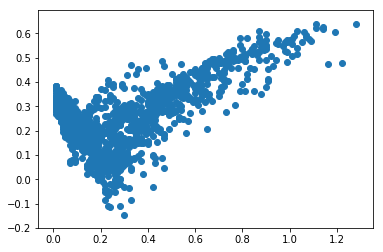

In [51]:
plt.scatter(y_test, y_test_pred1)

In [52]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)


In [53]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [54]:
# r2 of train and val
y_val_pred2= lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred2)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred2)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred2)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=2)
y_test_pred2 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred2)
print("R-squared score:", r2)
# mse of test and pred (degree=2)
mse = mean_squared_error(y_test, y_test_pred2)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred2)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.7191584123452541
Mean squared error: 0.014527100410554291
Root Mean Squared Error: 0.12052842158824735
Mean Absolute Error: 0.09810995544583907
R-squared score: 0.7313446532269194
Mean squared error: 0.015471771475916402
Root Mean Squared Error: 0.12438557583544968
Mean Absolute Error: 0.10181960871648603


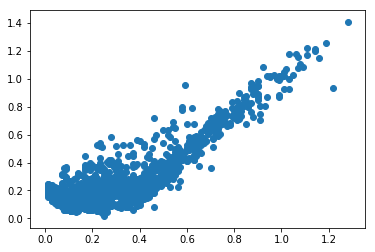

In [55]:
plt.scatter(y_test, y_test_pred2)

In [56]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

In [57]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [58]:
# r2 of train and val
y_val_pred3 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred3)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred3)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred3)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=3)
y_test_pred3 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred3)
print("R-squared score:", r2)
# mse of test and pred (degree=1)
mse = mean_squared_error(y_test, y_test_pred3)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred3)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.7905925539907299
Mean squared error: 0.010832024631032186
Root Mean Squared Error: 0.10407701298092767
Mean Absolute Error: 0.08159810993238983
R-squared score: 0.7920593277726116
Mean squared error: 0.011975233695862394
Root Mean Squared Error: 0.10943141091963675
Mean Absolute Error: 0.08664889509632331


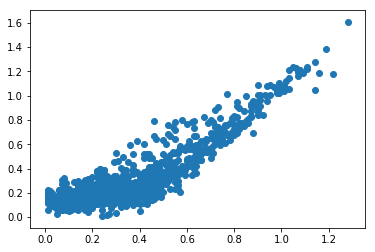

In [59]:
plt.scatter(y_test, y_test_pred3)

In [60]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

In [61]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [62]:
# r2 of train and val
y_val_pred4 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred4)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred4)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred4)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=4)
y_test_pred4 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred4)
print("R-squared score:", r2)
# mse of test and pred (degree=4)
mse = mean_squared_error(y_test, y_test_pred4)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred4)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.8493402568621544
Mean squared error: 0.00779318061355795
Root Mean Squared Error: 0.08827899304793836
Mean Absolute Error: 0.06580134106175592
R-squared score: 0.8519162885196532
Mean squared error: 0.008528091366313483
Root Mean Squared Error: 0.09234766573288944
Mean Absolute Error: 0.06832828137364895


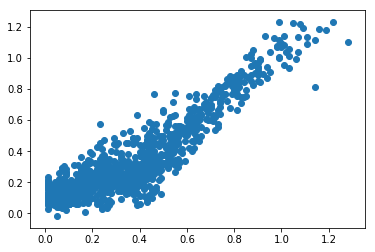

In [63]:
plt.scatter(y_test, y_test_pred4)

In [64]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

In [65]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [66]:
# r2 of train and val
y_val_pred5 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred5)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred5)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred5)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=5)
y_test_pred5 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred5)
print("R-squared score:", r2)
# mse of test and pred (degree=5)
mse = mean_squared_error(y_test, y_test_pred5)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred5)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.8747955684963966
Mean squared error: 0.006476453019255947
Root Mean Squared Error: 0.08047641281304695
Mean Absolute Error: 0.055821583807894884
R-squared score: 0.8696872590504338
Mean squared error: 0.00750466712309633
Root Mean Squared Error: 0.08662948183555255
Mean Absolute Error: 0.058800627059724664


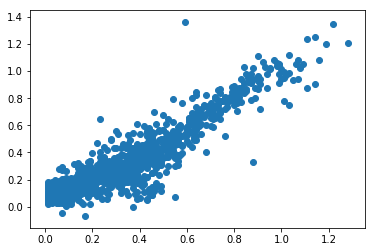

In [67]:
plt.scatter(y_test, y_test_pred5)

In [68]:
y_test

,Global_Sales
3883,0.51
6228,0.28
12132,0.07
5860,0.30
4568,0.42
...,...
6395,0.27
4656,0.41
6603,0.25
8337,0.17


In [69]:
pd.DataFrame(y_test_pred5)

,0
0,0.541757
1,0.278085
2,0.074097
3,0.261241
4,0.166700
...,...
1737,0.219825
1738,0.457144
1739,0.252766
1740,0.160032


In [70]:
##XGBOOST
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn import metrics

In [71]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)


In [72]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

In [73]:
xgb_reg.fit(X_train_poly, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [74]:
y_pred = xgb_reg.predict(X_val_poly)

In [81]:
r2_sales = metrics.r2_score(y_val, y_pred)
print('R Squared value = ', r2_sales)
mse = mean_squared_error(y_val, y_pred)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae=mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:",mae)

R Squared value =  0.9683361542208094
Mean squared error: 0.001637876608161361
Root Mean Squared Error: 0.040470688259051896
Mean Absolute Error: 0.02746627220234579


In [76]:
data_prediction =xgb_reg.predict(X_test_poly)

In [83]:
# R squared Value
r2_data = metrics.r2_score(y_test, data_prediction)
print('R Squared value = ', r2_data)
mse = mean_squared_error(y_test, data_prediction)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, data_prediction)
print("Mean Absolute Error:",mae_test)

R Squared value =  0.9673390771175726
Mean squared error: 0.0018809316140514637
Root Mean Squared Error: 0.04336970848474156
Mean Absolute Error: 0.02807052721428748


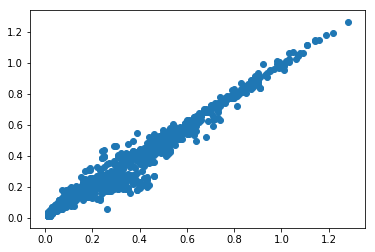

In [78]:
plt.scatter(y_test, data_prediction)

In [79]:
y_test

,Global_Sales
3883,0.51
6228,0.28
12132,0.07
5860,0.30
4568,0.42
...,...
6395,0.27
4656,0.41
6603,0.25
8337,0.17
